![](https://storage.googleapis.com/lyft-av-dataset/lyft.jpeg)

# Lyft Level 5 AV dataset and nuScenes devkit tutorial

Welcome to the Level 5 AV dataset & nuScenes SDK tutorial!


This notebook is based on the original nuScenes tutorial notebook (https://www.nuscenes.org/) and was adjusted for the Level 5 AV dataset.

## Introduction to the dataset structure

In this part of the tutorial, let us go through a top-down introduction of our database. Our dataset comprises of elemental building blocks that are the following:

1. `scene` - 25-45 seconds snippet of a car's journey.
2. `sample` - An annotated snapshot of a scene at a particular timestamp.
3. `sample_data` - Data collected from a particular sensor.
4. `sample_annotation` - An annotated instance of an object within our interest.
5. `instance` - Enumeration of all object instance we observed.
6. `category` - Taxonomy of object categories (e.g. vehicle, human). 
7. `attribute` - Property of an instance that can change while the category remains the same.
8. `visibility` - (currently not used)
9. `sensor` - A specific sensor type.
10. `calibrated sensor` - Definition of a particular sensor as calibrated on a particular vehicle.
11. `ego_pose` - Ego vehicle poses at a particular timestamp.
12. `log` - Log information from which the data was extracted.
13. `map` - Map data that is stored as binary semantic masks from a top-down view.

Let's get started! Make sure that you have a local copy of a dataset (for download instructions, see https://level5.lyft.com/dataset/). Then, adjust `dataroot` below to point to your local dataset path. If everything is set up correctly, you should be able to execute the following cell successfully.

In [1]:
import sys
sys.path += ['..']

In [2]:
# Load the SDK
%matplotlib inline
from lyft_dataset_sdk.lyftdataset import LyftDataset

# Load the dataset
# Adjust the dataroot parameter below to point to your local dataset path.
# The correct dataset path contains at least the following four folders (or similar): images, lidar, maps, v1.0.1-train
level5data = LyftDataset(image_path='/home/vladimir/workspace/data2/lyft/kaggle/train_images', 
                         lidar_path='/home/vladimir/workspace/data2/lyft/kaggle/train_lidar', 
                         json_path='/home/vladimir/workspace/data2/lyft/kaggle/train_data', 
                         verbose=True)

In /home/vladimir/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vladimir/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vladimir/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vladimir/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vladimir/anaconda3/lib/python3.7/site-packa

9 category,
18 attribute,
4 visibility,
18421 instance,
10 sensor,
148 calibrated_sensor,
177789 ego_pose,
180 log,
180 scene,
22680 sample,
189504 sample_data,
638179 sample_annotation,
Done loading in 7.0 seconds.
Reverse indexing ...
Done reverse indexing in 2.3 seconds.


In [3]:
level5data.list_categories()

Category stats
            category  num_annotations        width        length       height  \
0             animal              186  0.359±0.117    0.731±0.19  0.515±0.162   
1            bicycle            20928  0.625±0.239   1.763±0.293  1.441±0.368   
2                bus             8729  2.957±0.238  12.342±3.413  3.437±0.315   
3                car           534911  1.925±0.161   4.756±0.531  1.718±0.241   
4  emergency_vehicle              132  2.448±0.433   6.524±1.445  2.393±0.588   
5         motorcycle              818  0.963±0.199   2.352±0.217  1.585±0.159   
6      other_vehicle            33376  2.788±0.295   8.198±1.715  3.228±0.503   
7         pedestrian            24935  0.772±0.139   0.806±0.171  1.775±0.164   
8              truck            14164  2.845±0.321   10.24±4.094  3.436±0.615   

     lw_aspect  
0   2.16±0.557  
1  3.197±1.173  
2  4.171±1.102  
3   2.474±0.22  
4  2.661±0.277  
5  2.529±0.498  
6  2.935±0.533  
7    1.055±0.2  
8  3.562±1.248  


In [4]:
level5data.list_scenes()

host-a007-lidar0-1230485630199365106-12304856550990... [19-01-02 17:33:50]   25s, Palo Alto, #anns:1559
host-a007-lidar0-1230672860198383106-12306728850991... [19-01-04 21:34:20]   25s, Palo Alto, #anns:2969
host-a007-lidar0-1230936221299185986-12309362461986... [19-01-07 22:43:41]   25s, Palo Alto, #anns:683
host-a007-lidar0-1231093036199514746-12310930610996... [19-01-09 18:17:16]   25s, Palo Alto, #anns:3117
host-a009-lidar0-1231200854198312986-12312008790984... [19-01-11 00:14:14]   25s, Palo Alto, #anns:681
host-a005-lidar0-1231201437298603426-12312014621988... [19-01-11 00:23:57]   25s, Palo Alto, #anns:3064
host-a011-lidar0-1232401360198078026-12324013850983... [19-01-24 21:42:40]   25s, Palo Alto, #anns:3842
host-a011-lidar0-1232412236198491106-12324122610982... [19-01-25 00:43:56]   25s, Palo Alto, #anns:372
host-a007-lidar0-1232470052198454586-12324700770988... [19-01-25 16:47:32]   25s, Palo Alto, #anns:1614
host-a011-lidar0-1232485958298280666-12324859832000... [19-01-25 21

In [5]:
my_scene = level5data.scene[0]
my_scene

{'log_token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'first_sample_token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'name': 'host-a101-lidar0-1241893239199111666-1241893264098084346',
 'description': '',
 'last_sample_token': '2346756c83f6ae8c4d1adec62b4d0d31b62116d2e1819e96e9512667d15e7cec',
 'nbr_samples': 126,
 'token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100'}

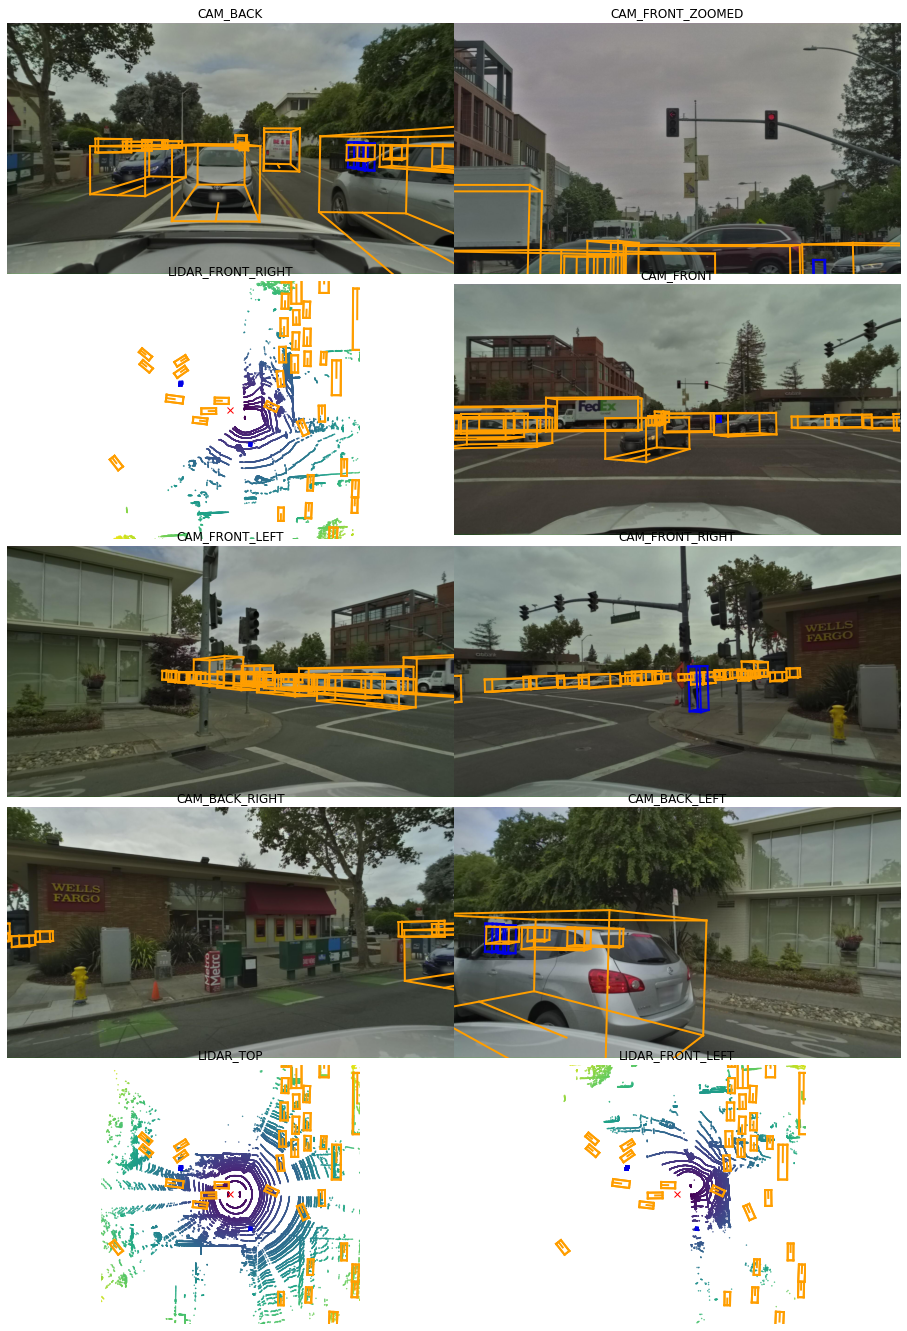

In [6]:
my_sample_token = my_scene["first_sample_token"]
# my_sample_token = level5data.get("sample", my_sample_token)["next"]  # proceed to next sample

level5data.render_sample(my_sample_token)

In [7]:
my_sample = level5data.get('sample', my_sample_token)
my_sample

{'next': 'c2ba18e4414ce9038ad52efab44e1a0a211ff1e6b297a632805000510756174d',
 'prev': '',
 'token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'timestamp': 1557858039302414.8,
 'scene_token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'data': {'CAM_BACK': '542a9e44f2e26221a6aa767c2a9b90a9f692c3aee2edb7145256b61e666633a4',
  'CAM_FRONT_ZOOMED': '9c9bc711d93d728666f5d7499703624249919dd1b290a477fcfa39f41b26259e',
  'LIDAR_FRONT_RIGHT': '8cfae06bc3d5d7f9be081f66157909ff18c9f332cc173d962460239990c7a4ff',
  'CAM_FRONT': 'fb40b3b5b9d289cd0e763bec34e327d3317a7b416f787feac0d387363b4d00f0',
  'CAM_FRONT_LEFT': 'f47a5d143bcebb24efc269b1a40ecb09440003df2c381a69e67cd2a726b27a0c',
  'CAM_FRONT_RIGHT': '5dc54375a9e14e8398a538ff97fbbee7543b6f5df082c60fc4477c919ba83a40',
  'CAM_BACK_RIGHT': 'ae8754c733560aa2506166cfaf559aeba670407631badadb065a9ffe7c337a7d',
  'CAM_BACK_LEFT': '01c0eecd4b56668e949143e02a117b5683025766d186920099d1e918c23c8b4b',
  'LIDAR

In [8]:
level5data.list_sample(my_sample['token'])

Sample: 24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8

sample_data_token: 542a9e44f2e26221a6aa767c2a9b90a9f692c3aee2edb7145256b61e666633a4, mod: camera, channel: CAM_BACK
sample_data_token: 9c9bc711d93d728666f5d7499703624249919dd1b290a477fcfa39f41b26259e, mod: camera, channel: CAM_FRONT_ZOOMED
sample_data_token: 8cfae06bc3d5d7f9be081f66157909ff18c9f332cc173d962460239990c7a4ff, mod: lidar, channel: LIDAR_FRONT_RIGHT
sample_data_token: fb40b3b5b9d289cd0e763bec34e327d3317a7b416f787feac0d387363b4d00f0, mod: camera, channel: CAM_FRONT
sample_data_token: f47a5d143bcebb24efc269b1a40ecb09440003df2c381a69e67cd2a726b27a0c, mod: camera, channel: CAM_FRONT_LEFT
sample_data_token: 5dc54375a9e14e8398a538ff97fbbee7543b6f5df082c60fc4477c919ba83a40, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: ae8754c733560aa2506166cfaf559aeba670407631badadb065a9ffe7c337a7d, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 01c0eecd4b56668e949143e02a117b5683025766d186920099d1e918c23

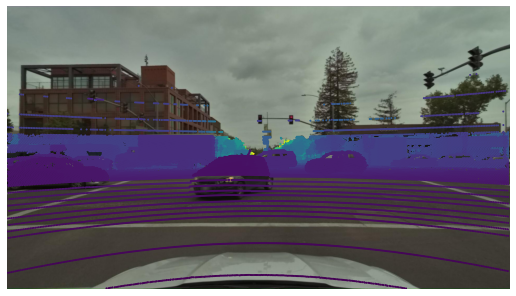

In [9]:
level5data.render_pointcloud_in_image(sample_token = my_sample["token"],
                                      dot_size = 1,
                                      camera_channel = 'CAM_FRONT')

In [10]:
my_sample['data']

{'CAM_BACK': '542a9e44f2e26221a6aa767c2a9b90a9f692c3aee2edb7145256b61e666633a4',
 'CAM_FRONT_ZOOMED': '9c9bc711d93d728666f5d7499703624249919dd1b290a477fcfa39f41b26259e',
 'LIDAR_FRONT_RIGHT': '8cfae06bc3d5d7f9be081f66157909ff18c9f332cc173d962460239990c7a4ff',
 'CAM_FRONT': 'fb40b3b5b9d289cd0e763bec34e327d3317a7b416f787feac0d387363b4d00f0',
 'CAM_FRONT_LEFT': 'f47a5d143bcebb24efc269b1a40ecb09440003df2c381a69e67cd2a726b27a0c',
 'CAM_FRONT_RIGHT': '5dc54375a9e14e8398a538ff97fbbee7543b6f5df082c60fc4477c919ba83a40',
 'CAM_BACK_RIGHT': 'ae8754c733560aa2506166cfaf559aeba670407631badadb065a9ffe7c337a7d',
 'CAM_BACK_LEFT': '01c0eecd4b56668e949143e02a117b5683025766d186920099d1e918c23c8b4b',
 'LIDAR_TOP': 'ec9950f7b5d4ae85ae48d07786e09cebbf4ee771d054353f1e24a95700b4c4af',
 'LIDAR_FRONT_LEFT': '5c3d79e1cf8c8182b2ceefa33af96cbebfc71f92e18bf64eb8d4e0bf162e01d4'}

In [11]:
sensor_channel = 'CAM_FRONT'  # also try this e.g. with 'LIDAR_TOP'
my_sample_data = level5data.get('sample_data', my_sample['data'][sensor_channel])
my_sample_data

{'width': 1920,
 'height': 1080,
 'calibrated_sensor_token': '8e73e320d1fa9e5af96059e6eb1dd7d28e3271dea04de86ead47fa25fd13fd20',
 'token': 'fb40b3b5b9d289cd0e763bec34e327d3317a7b416f787feac0d387363b4d00f0',
 'sample_token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'is_key_frame': True,
 'prev': '',
 'fileformat': 'jpeg',
 'ego_pose_token': '0c257254dad346c9d90f7970ce2c0b8142f7c6e6a90716f4c0538cd2d2ef77d5',
 'timestamp': 1557858039250000.0,
 'next': '00ba71deb97524b5d9be9b677962b74bb32f89284ad7838462250218786b903e',
 'filename': 'images/host-a101_cam0_1241893239250000006.jpeg',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

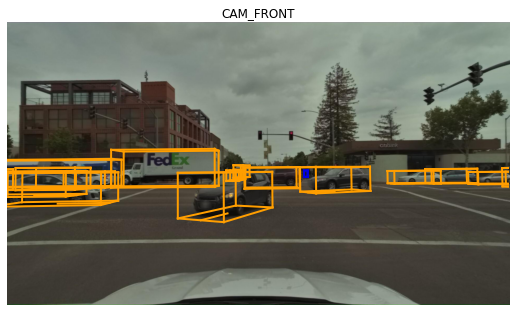

In [12]:
level5data.render_sample_data(my_sample_data['token'])

In [13]:
my_annotation_token = my_sample['anns'][16]
my_annotation =  my_sample_data.get('sample_annotation', my_annotation_token)
my_annotation

'1ec543ca38666e906886b71f662f45f1605344410e26962a58668a7511ba65ce'

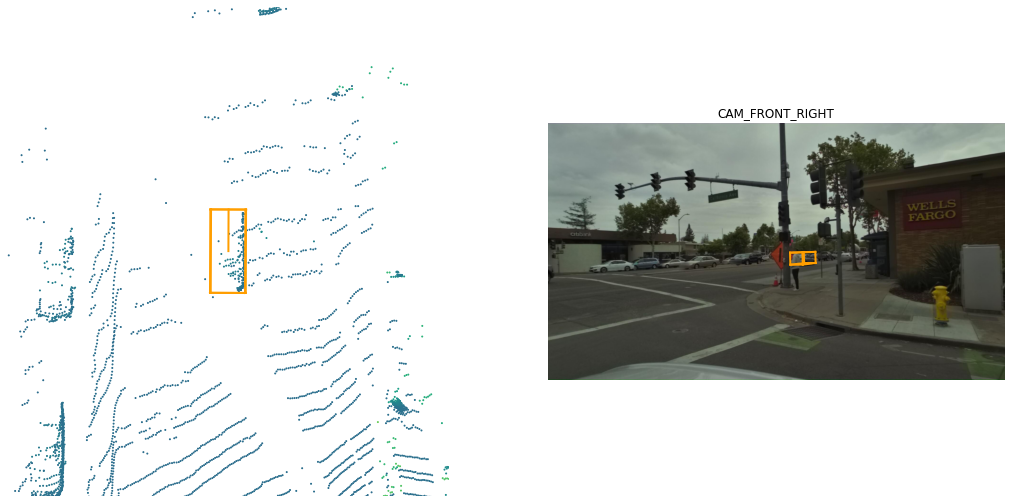

In [14]:
level5data.render_annotation(my_annotation_token)

In [15]:
my_instance = level5data.instance[100]
my_instance

{'last_annotation_token': '17be5c0175d3f4e36b9829d4789a6174d531637587107a0bfa1f3668d1ed9a57',
 'category_token': '8eccddb83fa7f8f992b2500f2ad658f65c9095588f3bc0ae338d97aff2dbcb9c',
 'token': '0984d7f7d64a8a03523e43ea01c7292488bd73ae745514077b28a9dc240b9f95',
 'first_annotation_token': 'b1f924cb04786ef4d46810ef8c3e7fe17597d4464507267dc56dcfbe1faa6581',
 'nbr_annotations': 56}

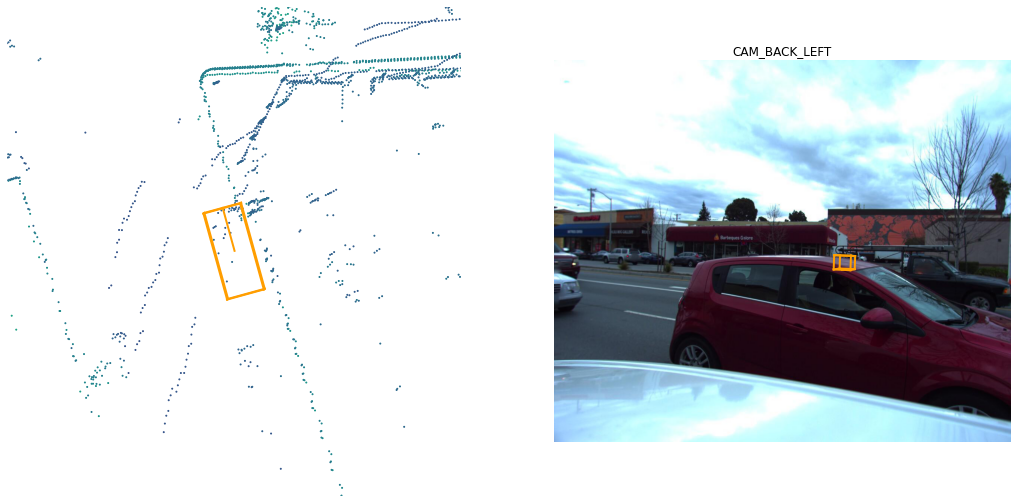

In [16]:
instance_token = my_instance['token']
level5data.render_instance(instance_token)

First annotated sample of this instance:


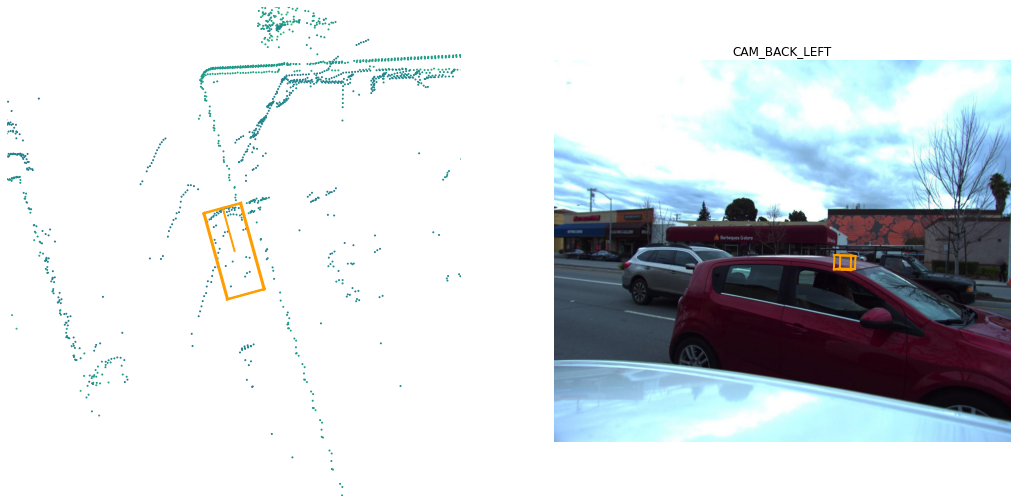

In [17]:
print("First annotated sample of this instance:")
level5data.render_annotation(my_instance['first_annotation_token'])

Last annotated sample of this instance


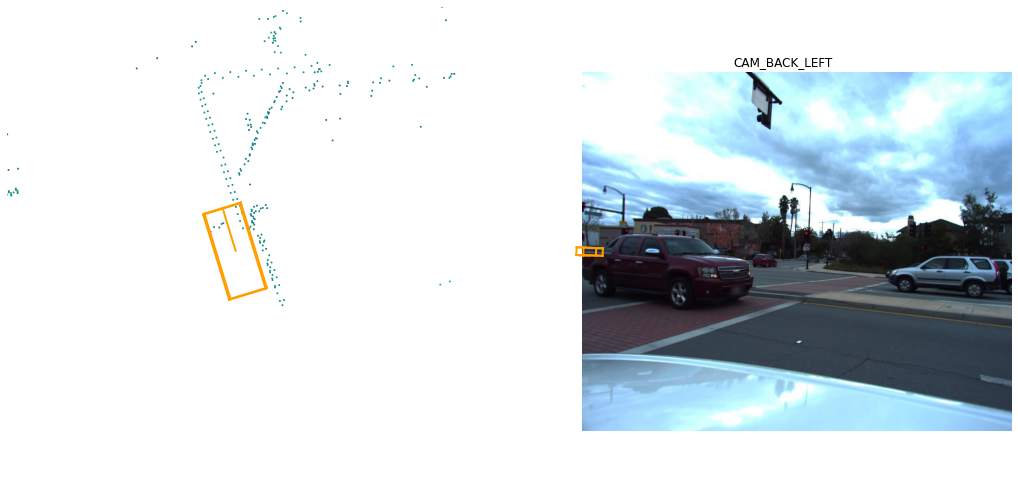

In [18]:
print("Last annotated sample of this instance")
level5data.render_annotation(my_instance['last_annotation_token'])

In [19]:
level5data.list_categories()

Category stats
            category  num_annotations        width        length       height  \
0             animal              186  0.359±0.117    0.731±0.19  0.515±0.162   
1            bicycle            20928  0.625±0.239   1.763±0.293  1.441±0.368   
2                bus             8729  2.957±0.238  12.342±3.413  3.437±0.315   
3                car           534911  1.925±0.161   4.756±0.531  1.718±0.241   
4  emergency_vehicle              132  2.448±0.433   6.524±1.445  2.393±0.588   
5         motorcycle              818  0.963±0.199   2.352±0.217  1.585±0.159   
6      other_vehicle            33376  2.788±0.295   8.198±1.715  3.228±0.503   
7         pedestrian            24935  0.772±0.139   0.806±0.171  1.775±0.164   
8              truck            14164  2.845±0.321   10.24±4.094  3.436±0.615   

     lw_aspect  
0   2.16±0.557  
1  3.197±1.173  
2  4.171±1.102  
3   2.474±0.22  
4  2.661±0.277  
5  2.529±0.498  
6  2.935±0.533  
7    1.055±0.2  
8  3.562±1.248  
